# Banking Deserts
---
The below script uncovers the well-known phenomenon of [Banking Deserts](https://en.wikipedia.org/wiki/Banking_desert). The concept is simple: many neighborhoods with predominantly low-income and elderly populations tend to have inadequate coverage of banking services. This leads such communities to be  vulnerable to predatory loan and pricey check casher providers.

In this script, we retrieved and plotted data from the 2013 US Census and Google Places API to show the relationship between various socioeconomic parameters and bank count across 700 randomly selected zip codes. We used Pandas, Numpy, Matplotlib, Requests, Census API, and Google API to accomplish our task.

**Instructions:**

  * In this activity your broad task is to answer the question: "What is the relationship between poverty, age, and population with the number of banks in a given area?" To help accomplish this task, you've been given census data for every zip code across the country. Your immediate task is to randomly sample a set of 700+ zip codes and then utilize both the Google Geocoder and Google Places Radar APIs to identify the number of banks in each of these zip codes within a 5 mile radius of a given point. Once you have the "bank counts", you'll then create a series of scatter plots comparing each of the following:

    * Population vs. Bank Count

    * Median Age vs. Bank Count

    * Household Income vs. Bank Count

    * Per Capita Income vs. Bank Count

    * Poverty Rate vs. Bank Count


  * A few hints / notes to consider:

    * This task is fairly challenging. Try to delegate "tasks" for each member of your group. As an example, one person may want to elucidate the code for identifying bank count for a single zip code. Another may be focused on selecting a set of 700 zip codes. Another may be focused on creating the scatter plots using dummy data. You choose the delegations and tasks but make sure to utilize your full-team to get the job done.

    * At a base level, the code necessary to complete this activity is very similar to that used in the airport example. Stick to the main strategy of: 1) Converting the census CSV to a DataFrame, 2) Sampling a random set of zip codes, 3) Identifying the Lat/Lng for each zip code, 4) Identifying the bank count for each lat/lng, and 5) Plotting the results.

    * Throughout the process you will likely need to employ the `iterrows()` and `set_value()` methods.

    * Remember to use `try-except` to handle instances where there may be no geocoordinates or bank information for a given zip code.

    * Do not rush straight into sending 700 API requests to Google from the start. Start with a very small sample size (10 instead of 700) for two reasons:
    
        - It's a lot faster to test your script with a small sample
        - Your API key might have limitations in terms of how many requests you can send per day.

          * Hint: Don't just assume you've reached your rate limit because your JSON isn't working... it's more likely a bug.

    * Good luck!

In [23]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import time
import apikeys

# Google Places API Key
gkey = apikeys.GOOGLE_DEV_KEY

## Data Retrieval

In [24]:
# Import the census data into a pandas DataFrame
census_pd = pd.read_csv("Census_Data.csv")

# Preview the data
census_pd.head()

,Zipcode,Address,Population,Median Age,Household Income,Per Capita Income,Poverty Rate
0,15081,"South Heights, PA 15081, USA",342,50.2,31500.0,22177,20.760234
1,20615,"Broomes Island, MD 20615, USA",424,43.4,114375.0,43920,5.188679
2,50201,"Nevada, IA 50201, USA",8139,40.4,56619.0,28908,7.777368
3,84020,"Draper, UT 84020, USA",42751,30.4,89922.0,33164,4.392880
4,39097,"Louise, MS 39097, USA",495,58.0,26838.0,17399,34.949495


In [37]:
# Randomly select 700 zip codes locations that have at least 100 residents
# HINT: Start with a very small sample size (10 instead of 700)
#       for two reasons:
#       - It's a lot faster to test your script with a small sample
#       - Your API key might have limitations in terms of how many
#         requests you can send per day.

selected_zips = census_pd.sample(n=700)
selected_zips = selected_zips[selected_zips["Population"] > 100]

# Visualize
# selected_zips.count()
selected_zips.head()


,Zipcode,Address,Population,Median Age,Household Income,Per Capita Income,Poverty Rate
317,12723,"Callicoon, NY 12723, USA",2196,43.2,58102.0,25249,11.703097
640,97875,"Stanfield, OR 97875, USA",2707,36.0,55478.0,22277,11.895087
263,55419,"Minneapolis, MN 55419, USA",26808,36.8,94177.0,49251,8.075947
515,28663,"Piney Creek, NC 28663, USA",709,39.6,36000.0,20294,13.399154
212,92285,"Landers, CA 92285, USA",2739,50.1,22917.0,17840,37.604965


In [38]:
# Create blank columns for necessary fields
selected_zips["Lat"] = ""
selected_zips["Lng"] = ""

# URL and query parameters
geocode_url = "https://maps.googleapis.com/maps/api/geocode/json"
parameters = {'key': gkey,
              'address': ''}

# Loop through and grab the lat/lng using Google maps
for index, row in selected_zips.iterrows():
    
    # Print log to ensure loop is working correctly
    print('Now retrieving zipcode ', row['Zipcode'])
    
    parameters['address'] = row['Zipcode']
    
    # Run requests to grab the JSON at the requested URL
    zip_location = requests.get(geocode_url, params=parameters).json()
    
    # Append the lat/lng to the appropriate columns
    # Use try / except to skip any cities with errors
    try: 
        zip_lat = zip_location["results"][0]["geometry"]["location"]["lat"]
        zip_lng = zip_location["results"][0]["geometry"]["location"]["lng"]
        
        selected_zips.set_value(index, "Lat", zip_lat)
        selected_zips.set_value(index, "Lng", zip_lng)
        
    except KeyError:
        print("Error with city data. Skipping")
        
# Visualize
selected_zips.head()

Now retrieving zipcode  12723
Now retrieving zipcode  97875
Now retrieving zipcode  55419
Now retrieving zipcode  28663
Now retrieving zipcode  92285
Now retrieving zipcode  22066
Now retrieving zipcode  16029
Now retrieving zipcode  33496
Now retrieving zipcode  71834
Now retrieving zipcode  12759
Now retrieving zipcode  21053
Now retrieving zipcode  12941
Now retrieving zipcode  74643
Now retrieving zipcode  45036
Now retrieving zipcode  72036
Now retrieving zipcode  17214
Now retrieving zipcode  63030
Now retrieving zipcode  32025
Now retrieving zipcode  75942
Now retrieving zipcode  2382
Now retrieving zipcode  26202
Now retrieving zipcode  56289
Now retrieving zipcode  26807
Now retrieving zipcode  66507
Now retrieving zipcode  39180
Now retrieving zipcode  55342
Now retrieving zipcode  57369
Now retrieving zipcode  28529
Now retrieving zipcode  24137
Now retrieving zipcode  30120
Now retrieving zipcode  38229
Now retrieving zipcode  65017
Now retrieving zipcode  59802
Now retriev

Now retrieving zipcode  37080
Now retrieving zipcode  58331
Now retrieving zipcode  11693
Now retrieving zipcode  37101
Now retrieving zipcode  67351
Now retrieving zipcode  96783
Now retrieving zipcode  79345
Now retrieving zipcode  13312
Now retrieving zipcode  35801
Now retrieving zipcode  24281
Now retrieving zipcode  49893
Now retrieving zipcode  49616
Now retrieving zipcode  76706
Now retrieving zipcode  31007
Now retrieving zipcode  62340
Now retrieving zipcode  77039
Now retrieving zipcode  38504
Now retrieving zipcode  77336
Now retrieving zipcode  46704
Now retrieving zipcode  85250
Now retrieving zipcode  4637
Now retrieving zipcode  94539
Now retrieving zipcode  41046
Now retrieving zipcode  85262
Now retrieving zipcode  12769
Now retrieving zipcode  12804
Now retrieving zipcode  72680
Now retrieving zipcode  62063
Now retrieving zipcode  24843
Now retrieving zipcode  4107
Now retrieving zipcode  33559
Now retrieving zipcode  88353
Now retrieving zipcode  49098
Now retrievi

Now retrieving zipcode  83841
Now retrieving zipcode  5261
Now retrieving zipcode  55435
Now retrieving zipcode  22025
Now retrieving zipcode  64081
Now retrieving zipcode  624
Now retrieving zipcode  27288
Now retrieving zipcode  28436
Now retrieving zipcode  52533
Now retrieving zipcode  8540
Now retrieving zipcode  18042
Now retrieving zipcode  47232
Now retrieving zipcode  13495
Now retrieving zipcode  72079
Now retrieving zipcode  57429
Now retrieving zipcode  63951
Now retrieving zipcode  63935
Now retrieving zipcode  17946
Now retrieving zipcode  29170
Now retrieving zipcode  53816
Now retrieving zipcode  32409
Now retrieving zipcode  43157
Now retrieving zipcode  5156
Now retrieving zipcode  76525
Now retrieving zipcode  83830
Now retrieving zipcode  61013
Now retrieving zipcode  32535
Now retrieving zipcode  6883
Now retrieving zipcode  52560
Now retrieving zipcode  41073
Now retrieving zipcode  84020
Now retrieving zipcode  23055
Now retrieving zipcode  6824
Now retrieving zi

,Zipcode,Address,Population,Median Age,Household Income,Per Capita Income,Poverty Rate,Lat,Lng
317,12723,"Callicoon, NY 12723, USA",2196,43.2,58102.0,25249,11.703097,41.7682,-75.0027
640,97875,"Stanfield, OR 97875, USA",2707,36.0,55478.0,22277,11.895087,45.8064,-119.17
263,55419,"Minneapolis, MN 55419, USA",26808,36.8,94177.0,49251,8.075947,44.9061,-93.2885
515,28663,"Piney Creek, NC 28663, USA",709,39.6,36000.0,20294,13.399154,36.5401,-81.3069
212,92285,"Landers, CA 92285, USA",2739,50.1,22917.0,17840,37.604965,34.335,-116.537


In [39]:
# Create an empty column for bank count
selected_zips["Bank Count"] = ""

# URL and query parameters
place_url = "https://maps.googleapis.com/maps/api/place/radarsearch/json"
parameters = {'key': gkey,
              'location': '',
              'radius': 8000,
              'type': 'bank'}

# Loop through and run Google search to get all banks
# in 5 mile radius (8000 meters)
for index, row in selected_zips.iterrows():
    
    # Print log to ensure loop is working correctly
    print('Now retrieving zipcode ', row['Zipcode'])
    
    parameters['location'] = str(row['Lat']) + ',' + str(row['Lng'])
    
    # Run requests to grab the JSON at the requested URL
    bank_data = requests.get(place_url, params=parameters).json()
    
    # Measure bank count on the number of results in the retrieved area
    bank_count = len(bank_data["results"])
    
    print("Final Bank Count: " + str(bank_count))
    print("")
    
    # Store the bank count into the Data Frame
    selected_zips.set_value(index, "Bank Count", bank_count)
        
# Visualize
selected_zips.head()

Now retrieving zipcode  12723
Final Bank Count: 5

Now retrieving zipcode  97875
Final Bank Count: 1

Now retrieving zipcode  55419
Final Bank Count: 161

Now retrieving zipcode  28663
Final Bank Count: 0

Now retrieving zipcode  92285
Final Bank Count: 1

Now retrieving zipcode  22066
Final Bank Count: 51

Now retrieving zipcode  16029
Final Bank Count: 18

Now retrieving zipcode  33496
Final Bank Count: 123

Now retrieving zipcode  71834
Final Bank Count: 0

Now retrieving zipcode  12759
Final Bank Count: 9

Now retrieving zipcode  21053
Final Bank Count: 7

Now retrieving zipcode  12941
Final Bank Count: 0

Now retrieving zipcode  74643
Final Bank Count: 1

Now retrieving zipcode  45036
Final Bank Count: 23

Now retrieving zipcode  72036
Final Bank Count: 0

Now retrieving zipcode  17214
Final Bank Count: 5

Now retrieving zipcode  63030
Final Bank Count: 0

Now retrieving zipcode  32025
Final Bank Count: 0

Now retrieving zipcode  75942
Final Bank Count: 4

Now retrieving zipcode  

Final Bank Count: 1

Now retrieving zipcode  2543
Final Bank Count: 39

Now retrieving zipcode  28732
Final Bank Count: 10

Now retrieving zipcode  62373
Final Bank Count: 0

Now retrieving zipcode  98106
Final Bank Count: 176

Now retrieving zipcode  59522
Final Bank Count: 3

Now retrieving zipcode  79703
Final Bank Count: 77

Now retrieving zipcode  97396
Final Bank Count: 0

Now retrieving zipcode  41540
Final Bank Count: 3

Now retrieving zipcode  48416
Final Bank Count: 4

Now retrieving zipcode  65729
Final Bank Count: 0

Now retrieving zipcode  95237
Final Bank Count: 2

Now retrieving zipcode  79778
Final Bank Count: 1

Now retrieving zipcode  4010
Final Bank Count: 3

Now retrieving zipcode  17938
Final Bank Count: 3

Now retrieving zipcode  62613
Final Bank Count: 1

Now retrieving zipcode  36736
Final Bank Count: 0

Now retrieving zipcode  50525
Final Bank Count: 5

Now retrieving zipcode  74456
Final Bank Count: 2

Now retrieving zipcode  4418
Final Bank Count: 0

Now retr

Final Bank Count: 0

Now retrieving zipcode  75457
Final Bank Count: 7

Now retrieving zipcode  69163
Final Bank Count: 1

Now retrieving zipcode  5301
Final Bank Count: 0

Now retrieving zipcode  64480
Final Bank Count: 0

Now retrieving zipcode  61606
Final Bank Count: 55

Now retrieving zipcode  25165
Final Bank Count: 1

Now retrieving zipcode  57005
Final Bank Count: 5

Now retrieving zipcode  11385
Final Bank Count: 197

Now retrieving zipcode  17774
Final Bank Count: 0

Now retrieving zipcode  95008
Final Bank Count: 148

Now retrieving zipcode  68930
Final Bank Count: 1

Now retrieving zipcode  55346
Final Bank Count: 68

Now retrieving zipcode  50201
Final Bank Count: 7

Now retrieving zipcode  50002
Final Bank Count: 2

Now retrieving zipcode  44629
Final Bank Count: 2

Now retrieving zipcode  58494
Final Bank Count: 1

Now retrieving zipcode  50433
Final Bank Count: 1

Now retrieving zipcode  4357
Final Bank Count: 1

Now retrieving zipcode  59542
Final Bank Count: 0

Now re

Final Bank Count: 48

Now retrieving zipcode  90302
Final Bank Count: 121

Now retrieving zipcode  73951
Final Bank Count: 0

Now retrieving zipcode  8002
Final Bank Count: 200

Now retrieving zipcode  19372
Final Bank Count: 26

Now retrieving zipcode  30601
Final Bank Count: 24

Now retrieving zipcode  5658
Final Bank Count: 0

Now retrieving zipcode  28395
Final Bank Count: 1

Now retrieving zipcode  27262
Final Bank Count: 32

Now retrieving zipcode  2740
Final Bank Count: 23

Now retrieving zipcode  54151
Final Bank Count: 2

Now retrieving zipcode  68723
Final Bank Count: 105

Now retrieving zipcode  6069
Final Bank Count: 2

Now retrieving zipcode  13326
Final Bank Count: 8

Now retrieving zipcode  42366
Final Bank Count: 0

Now retrieving zipcode  12464
Final Bank Count: 2

Now retrieving zipcode  40060
Final Bank Count: 0

Now retrieving zipcode  37923
Final Bank Count: 94

Now retrieving zipcode  4268
Final Bank Count: 0

Now retrieving zipcode  84116
Final Bank Count: 0

Now

Final Bank Count: 127

Now retrieving zipcode  45005
Final Bank Count: 42

Now retrieving zipcode  28697
Final Bank Count: 14

Now retrieving zipcode  49415
Final Bank Count: 9

Now retrieving zipcode  25431
Final Bank Count: 0

Now retrieving zipcode  41835
Final Bank Count: 5

Now retrieving zipcode  19023
Final Bank Count: 198

Now retrieving zipcode  17263
Final Bank Count: 19

Now retrieving zipcode  73743
Final Bank Count: 0

Now retrieving zipcode  14555
Final Bank Count: 2

Now retrieving zipcode  99753
Final Bank Count: 0

Now retrieving zipcode  33029
Final Bank Count: 15

Now retrieving zipcode  60565
Final Bank Count: 123

Now retrieving zipcode  13068
Final Bank Count: 3

Now retrieving zipcode  54022
Final Bank Count: 6

Now retrieving zipcode  23389
Final Bank Count: 0

Now retrieving zipcode  17018
Final Bank Count: 6

Now retrieving zipcode  46996
Final Bank Count: 0

Now retrieving zipcode  78072
Final Bank Count: 0

Now retrieving zipcode  30268
Final Bank Count: 1



,Zipcode,Address,Population,Median Age,Household Income,Per Capita Income,Poverty Rate,Lat,Lng,Bank Count
317,12723,"Callicoon, NY 12723, USA",2196,43.2,58102.0,25249,11.703097,41.7682,-75.0027,5
640,97875,"Stanfield, OR 97875, USA",2707,36.0,55478.0,22277,11.895087,45.8064,-119.17,1
263,55419,"Minneapolis, MN 55419, USA",26808,36.8,94177.0,49251,8.075947,44.9061,-93.2885,161
515,28663,"Piney Creek, NC 28663, USA",709,39.6,36000.0,20294,13.399154,36.5401,-81.3069,0
212,92285,"Landers, CA 92285, USA",2739,50.1,22917.0,17840,37.604965,34.335,-116.537,1


## Save Dataframe

In [40]:
# Save the DataFrame as a csv
selected_zips.to_csv("output_analysis/zip_bank_data.csv", encoding="utf-8", index=False)

## Plot Graphs

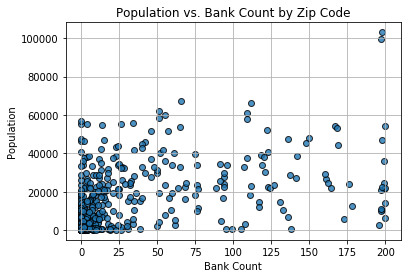

In [41]:
# Build a scatter plot for each data type
plt.scatter(selected_zips["Bank Count"], 
            selected_zips["Population"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Zip Codes")

# Incorporate the other graph properties
plt.title("Population vs. Bank Count by Zip Code")
plt.ylabel("Population")
plt.xlabel("Bank Count")
plt.grid(True)
# plt.xlim([-2.5, 202])
# plt.ylim([-2.5, 110000])

# Save the figure
plt.savefig("output_analysis/Population_BankCount.png")

# Show plot
plt.show()

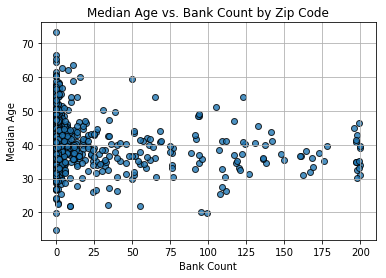

In [42]:
# Build a scatter plot for each data type
plt.scatter(selected_zips["Bank Count"], 
            selected_zips["Median Age"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Zip Codes")

# Incorporate the other graph properties
plt.title("Median Age vs. Bank Count by Zip Code")
plt.ylabel("Median Age")
plt.xlabel("Bank Count")
plt.grid(True)
# plt.xlim([-2.5, 202])

# Save the figure
plt.savefig("output_analysis/Age_BankCount.png")

# Show plot
plt.show()

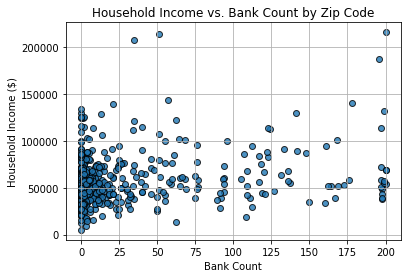

In [43]:
# Build a scatter plot for each data type
plt.scatter(selected_zips["Bank Count"], 
            selected_zips["Household Income"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Zip Codes")

# Incorporate the other graph properties
plt.title("Household Income vs. Bank Count by Zip Code")
plt.ylabel("Household Income ($)")
plt.xlabel("Bank Count")
plt.grid(True)
# plt.xlim([-2.5, 202])
# plt.ylim([-2.5, 230000])

# Save the figure
plt.savefig("output_analysis/HouseholdIncome_BankCount.png")

# Show plot
plt.show()

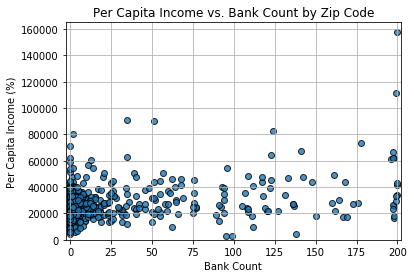

In [44]:
# Build a scatter plot for each data type
plt.scatter(selected_zips["Bank Count"], 
            selected_zips["Per Capita Income"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Zip Codes")

# Incorporate the other graph properties
plt.title("Per Capita Income vs. Bank Count by Zip Code")
plt.ylabel("Per Capita Income (%)")
plt.xlabel("Bank Count")
plt.grid(True)
plt.xlim([-2.5, 202])
plt.ylim([0, 165000])

# Save the figure
plt.savefig("output_analysis/PerCapitaIncome_BankCount.png")

# Show plot
plt.show()

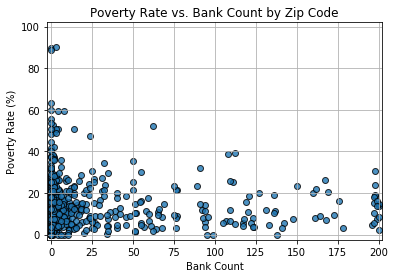

In [45]:
# Build a scatter plot for each data type
plt.scatter(selected_zips["Bank Count"], 
            selected_zips["Poverty Rate"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Zip Codes")

# Incorporate the other graph properties
plt.title("Poverty Rate vs. Bank Count by Zip Code")
plt.ylabel("Poverty Rate (%)")
plt.xlabel("Bank Count")
plt.grid(True)
plt.xlim([-2.5, 202])
plt.ylim([-2.5, 102])

# Save the figure
plt.savefig("output_analysis/PovertyRate_BankCount.png")

# Show plot
plt.show()